## Fits for Datasets

### Why we build models
- Help up understand the process that generated the data
    - E.g., the properties of a particular linear spring
    
- Help us make predictions about out-of-sample data
    - E.g., predict the displacement of a spring when a force is applied to it
    - E.g., predict the effect of treatment on a patient
    
- A good model helps us do these things

In [4]:
import random
from lecture11_segment1 import *
import pylab

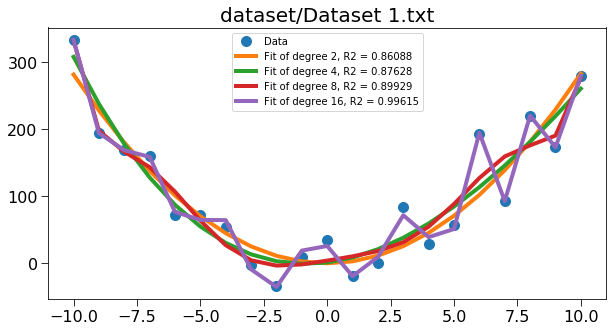

In [6]:
# generate data
random.seed(0)

degrees = (2, 4, 8, 16)

pylab.figure(figsize=(10, 5))
xVals1, yVals1 = getData('dataset/Dataset 1.txt')
models1 = genFits(xVals1, yVals1, degrees)
testFits(models1, degrees, xVals1, yVals1, 'dataset/Dataset 1.txt')

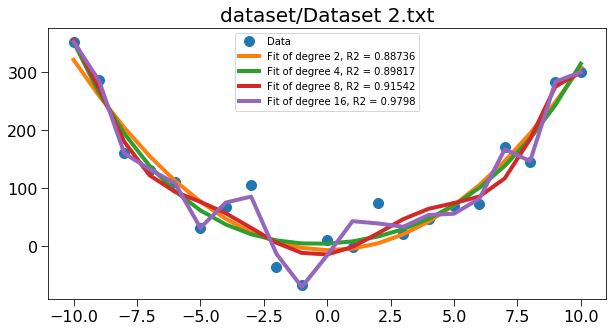

In [7]:
pylab.figure(figsize=(10, 5))
xVals2, yVals2 = getData('dataset/Dataset 2.txt')
models2 = genFits(xVals2, yVals2, degrees)
testFits(models2, degrees, xVals2, yVals2, 'dataset/Dataset 2.txt')

### Hence, Degree 16 Is Tightest Fit
- What we are looking at is training error
- How well the model performs on the data from which it was learned
- Small training error a necessary condition for a great model, but not a sufficient one
- We want model to work well on other data generated by the same process
    - Measurements for other weights on the spring
    - Voters other than those surveyed
    - Etc...
- I.e., it needs to generalize

### Cross Validate
- Generate models using one dataset, and then test it on the other
    - Use models for Dataset 1 to predict points for Dataset 2
    - Use models for Dataset 2 to predict points for Dataset 1
    
- Expect testing error to be larger than training error
- A better indication of generalizability thatn training error

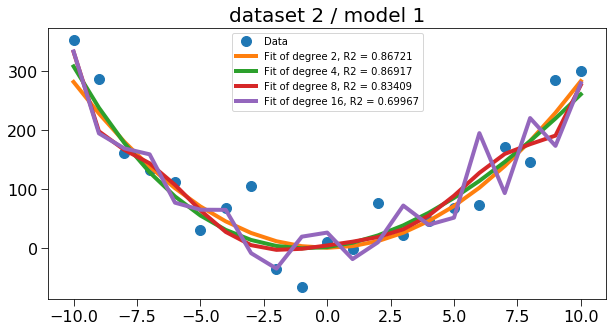

In [8]:
pylab.figure(figsize=(10, 5))
testFits(models1, degrees, xVals2, yVals2, 'dataset 2 / model 1')

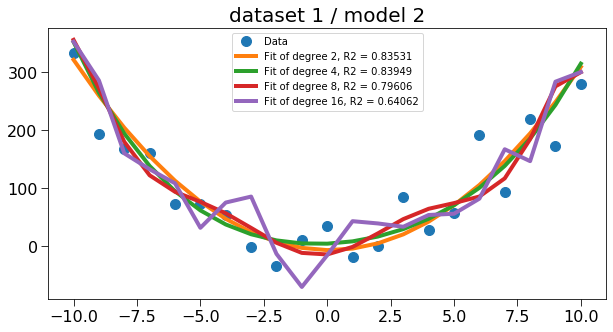

In [9]:
pylab.figure(figsize=(10, 5))
testFits(models2, degrees, xVals1, yVals1, 'dataset 1 / model 2')

## Model Predictions ad Overfitting

### Increasing the Complexity
- What happens when we increase order of polynomial
    - Can we get a worse fit to training data?
- If extra term is useless, coefficient will merely be zero
- But if data is noisy, can fit the noise rather than the underlying pattern in the data

In [10]:
from lecture11_segment2 import *

### Fitting a Quadratic to a Perfect Line

a = 0.0 b = 1.0 c = 0.0
R-squared =  1.0


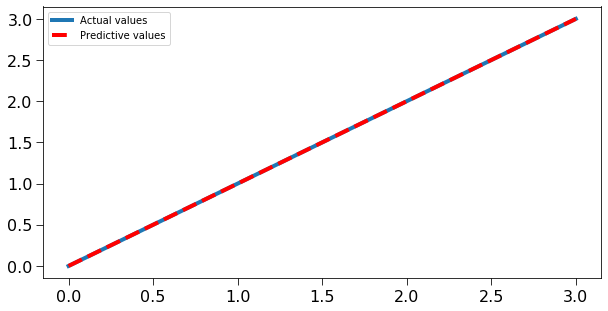

In [12]:
pylab.figure(figsize=(10, 5))
xVals = (0,1,2,3)
yVals = xVals
pylab.plot(xVals, yVals, label = 'Actual values')
a,b,c = pylab.polyfit(xVals, yVals, 2)
print('a =', round(a, 4), 'b =', round(b, 4), 'c =', round(c, 4))
estYVals = pylab.polyval((a,b,c), xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predictive values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')

### Predict Another Point Using Same Model

R-squared =  1.0


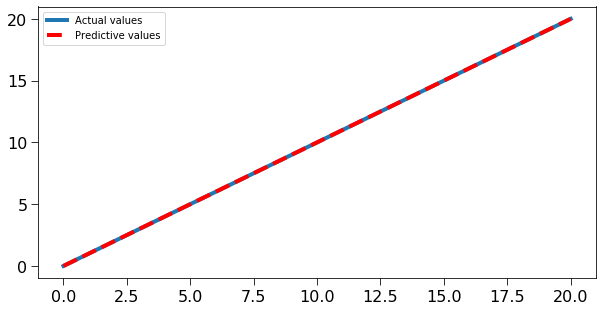

In [13]:
pylab.figure(figsize=(10, 5))
#Extend domain
xVals = xVals + (20,)
yVals = xVals
pylab.plot(xVals, yVals, label = 'Actual values')
estYVals = pylab.polyval((a,b,c), xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predictive values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')

### Simulate a Small Measurement Error

[ 1.03 -0.02]
R-squared =  0.9994347621290627


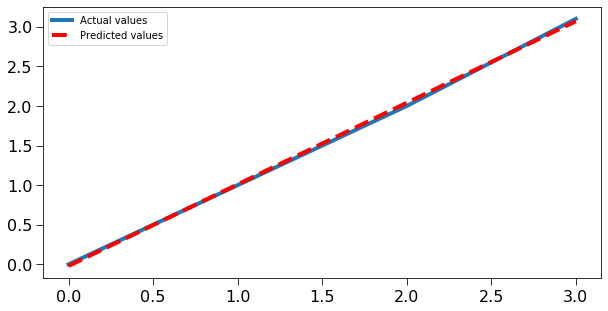

In [14]:
pylab.figure(figsize=(10, 5))
#almost a line
xVals = (0,1,2,3)
yVals = (0,1,2,3.1)
pylab.plot(xVals, yVals, label = 'Actual values')
model = pylab.polyfit(xVals, yVals, 1)
print(model)
estYVals = pylab.polyval(model, xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predicted values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')

### Predict Another Point Using Same Model


R-squared =  0.9987682926829268


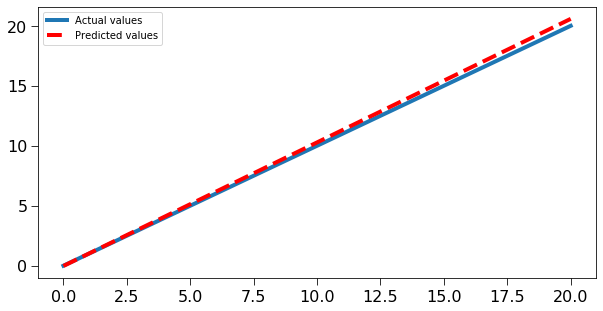

In [15]:
pylab.figure(figsize=(10, 5))
#Extend domain
xVals = xVals + (20,)
yVals = xVals
pylab.plot(xVals, yVals, label = 'Actual values')
estYVals = pylab.polyval(model, xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predicted values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')

### The Take Home Message
- Choosing an over-complex model leads to **overfitting** to the training data
- Increases the risk of a model that works poorly on data not included in the training set
- On the other hand, choosing an insufficiently complex model has other problems
    - As we saw when we fit a line to data that was basically parabolic

## Cross-Validation

### Suppose We Don`t Have a Solid Theory
- Use cross-validate results guide the choice of model complexity
- If dataset small, use leave one-one-out cross validation
- If data large enough, use k-fold cross validation or repeated-random-sampling validation

### Leave-one-out Cross Validation

```
Let D be the original data set

testResults = []
for i in range(len(D)):
    training = D[:].pop(i)
    model = buildModel(training)
    testResults.append(test(model, D[i])
    
Average testResults
```

### Repeated Random Sampling
```
Let D be the original data set
    n be the number of random samples
    
testResults = []
for i in range(n)
    randomly partition D into two sets:
        training and test
    model = buildModel(training)
    testResults.append(test(model, test))
    
Average testResults
```

### An Example, Temperature By Year
- Task: Model how the mean daily high temperature in the U.S varied from 1961 through 2015
- Get means for each year and plot them
- Randomly divide data in half n times
    - For each dimensionality to be tried
        - Train on one half of data
        - Test on other half
        - Record R-squared on test data
- Report mean R-squared for each dimensionality

In [16]:
from lecture11_segment3 import *

Text(0.5, 1.0, 'Select U.S. Cities')

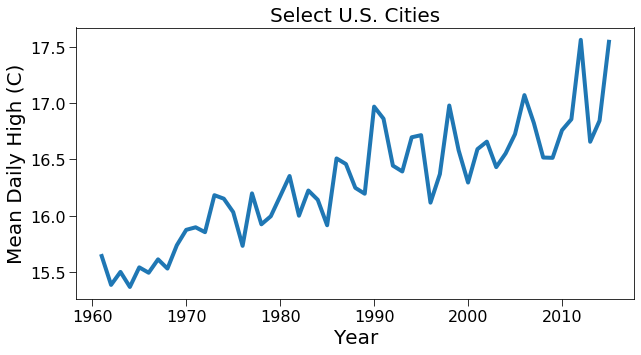

In [18]:
pylab.figure(figsize=(10, 5))
data = getTempData()
years = getYearlyMeans(data)
xVals, yVals = [], []
for e in years:
    xVals.append(e)
    yVals.append(years[e])
pylab.plot(xVals, yVals)
pylab.xlabel('Year')
pylab.ylabel('Mean Daily High (C)')
pylab.title('Select U.S. Cities')

In [19]:
numSubsets = 10
dimensions = (1, 2, 3)
rSquares = {}
for d in dimensions:
    rSquares[d] = []
    
for f in range(numSubsets):
    trainX, trainY, testX, testY = splitData(xVals, yVals)
    for d in dimensions:
        model = pylab.polyfit(trainX, trainY, d)
        estYVals = pylab.polyval(model, trainX)
        estYVals = pylab.polyval(model, testX)
        rSquares[d].append(rSquared(testY, estYVals))
print('Mean R-squares for test data')
for d in dimensions:
    mean = round(sum(rSquares[d])/len(rSquares[d]), 4)
    sd = round(numpy.std(rSquares[d]), 4)
    print('For dimensionality', d, 'mean =', mean,
          'Std =', sd)
print(rSquares[1])


Mean R-squares for test data
For dimensionality 1 mean = 0.7535 Std = 0.0656
For dimensionality 2 mean = 0.7291 Std = 0.0744
For dimensionality 3 mean = 0.7039 Std = 0.0684
[0.7828002156420516, 0.8063796402505189, 0.7963713275727426, 0.7843388574321191, 0.7600111202485312, 0.5708893650703579, 0.7211540856258911, 0.7435827676214902, 0.7903145537514851, 0.7792023858639938]


### Wrapping Up Curve Fitting
- We can use linear regression to fit a curve to data
    - Mapping from independent values to dependent values
- That curve is a model of the data that can be used to predict the value associated with independent values we haven't seen (out of sample data)
- R-squared used to evaluate model
    - Higher not always "better" because of risk of overfitting
- Choose complexity of model based on
    - Theory about structure of data
    - Cross validation
    - Simplicity